<a href="https://colab.research.google.com/github/Skyreacher-hub/COVID-19-Exploratory-Data-Analysis/blob/main/Copy_of_COVID19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# import data and view the data
df = pd.read_csv('/content/drive/MyDrive/COVID19 Dataset.csv')
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,11/1/2024,Argentina,NaN,NaN,unknown
1,11/1/2024,Australia,0.0,0.0,327
2,11/1/2024,Australia,0.0,0.0,327
3,11/1/2024,Brazil,971.0,48.0,430
4,11/1/2024,Canada,176.0,8.0,unknown


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         165 non-null    object 
 1   country      165 non-null    object 
 2    NEW Cases   154 non-null    float64
 3   NEW_DEATHS   139 non-null    float64
 4   vaccinated   165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


In [12]:
# for data cleaning, check the column names to ensure there will be consistency through the code to avoid wrong column names.
print(df.columns)

Index(['DATE ', 'country ', ' NEW Cases', 'NEW_DEATHS', 'vaccinated '], dtype='object')


In [13]:
# some column names have whitespaces. Write a code to remove whitespaces

df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['DATE', 'country', 'NEWCases', 'NEW_DEATHS', 'vaccinated'], dtype='object')

In [14]:
# change the column name "NEWCases" to "NEW_CASES"

df = df.rename(columns={'NEWCases': 'NEW_CASES'})
df.columns

Index(['DATE', 'country', 'NEW_CASES', 'NEW_DEATHS', 'vaccinated'], dtype='object')

In [15]:
# write a code to account for missing values and for missing values, replace with the mean of the values in that column

# check for missing values
print(df.isnull().sum())

# impute missing values with the mean for numerical columns
for col in df.columns:
  if df[col].dtype in ['int64', 'float64']:
    df[col] = df[col].fillna(df[col].mean())

# check if missing values are handled
print(df.isnull().sum())

DATE           0
country        0
NEW_CASES     11
NEW_DEATHS    26
vaccinated     0
dtype: int64
DATE          0
country       0
NEW_CASES     0
NEW_DEATHS    0
vaccinated    0
dtype: int64


**From the code above, NEW_CASES had 11 missing values and NEW_DEATHS had 26
missing values. But they have been replaced with mean values.**

In [16]:
df.head()

,DATE,country,NEW_CASES,NEW_DEATHS,vaccinated
0,11/1/2024,Argentina,579.032468,28.47482,unknown
1,11/1/2024,Australia,0.000000,0.00000,327
2,11/1/2024,Australia,0.000000,0.00000,327
3,11/1/2024,Brazil,971.000000,48.00000,430
4,11/1/2024,Canada,176.000000,8.00000,unknown


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        165 non-null    object 
 1   country     165 non-null    object 
 2   NEW_CASES   165 non-null    float64
 3   NEW_DEATHS  165 non-null    float64
 4   vaccinated  165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


In [18]:
# in the vaccination column, there are inputs called unknown. Replace the unknown with zeros (0).
df['vaccinated'] = df['vaccinated'].replace('unknown', 0)
df.head()


,DATE,country,NEW_CASES,NEW_DEATHS,vaccinated
0,11/1/2024,Argentina,579.032468,28.47482,0
1,11/1/2024,Australia,0.000000,0.00000,327
2,11/1/2024,Australia,0.000000,0.00000,327
3,11/1/2024,Brazil,971.000000,48.00000,430
4,11/1/2024,Canada,176.000000,8.00000,0


In [19]:
# to aid data manipulation for graph plotting, convert datatype for vaccinated column from object to integer
df['vaccinated'] = df['vaccinated'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        165 non-null    object 
 1   country     165 non-null    object 
 2   NEW_CASES   165 non-null    float64
 3   NEW_DEATHS  165 non-null    float64
 4   vaccinated  165 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.6+ KB


In [20]:
# convert datatype for DATE column from object to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        165 non-null    datetime64[ns]
 1   country     165 non-null    object        
 2   NEW_CASES   165 non-null    float64       
 3   NEW_DEATHS  165 non-null    float64       
 4   vaccinated  165 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 6.6+ KB


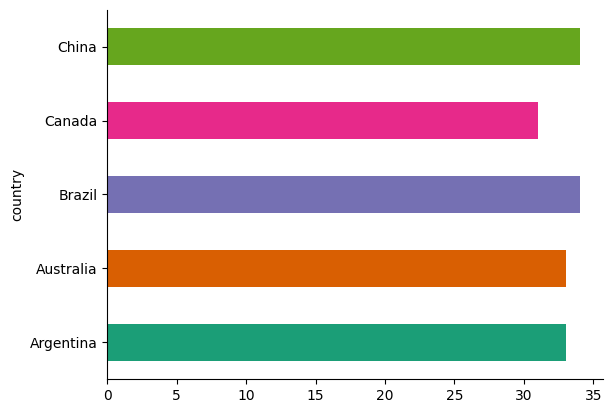

In [21]:
# Visualize the frequency of data for each country reported in our data

df.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


In [22]:

# Sort by date to ensure correct plotting order
df = df.sort_values(by='DATE')



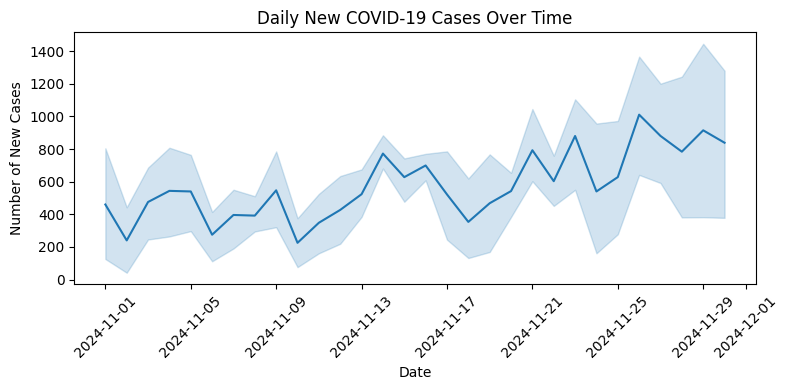

In [23]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='DATE', y='NEW_CASES')
plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**The line plot shows an upward trend of new cases from 1st of November to 30th of November.**


/tmp/ipython-input-708069693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='NEW_CASES', y='country', inner='stick', palette='Dark2')


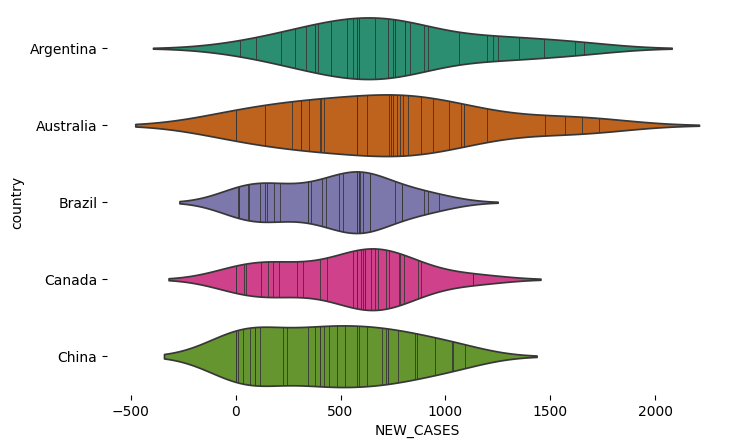

In [24]:
#Country vs New Cases using a violin plot
figsize = (8, 1.0 * len(df['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='NEW_CASES', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


**The Violin Plot shows that Argentina had the highest number of total new cases over the period**

/tmp/ipython-input-859312995.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='NEW_DEATHS', y='country', inner='stick', palette='Dark2')


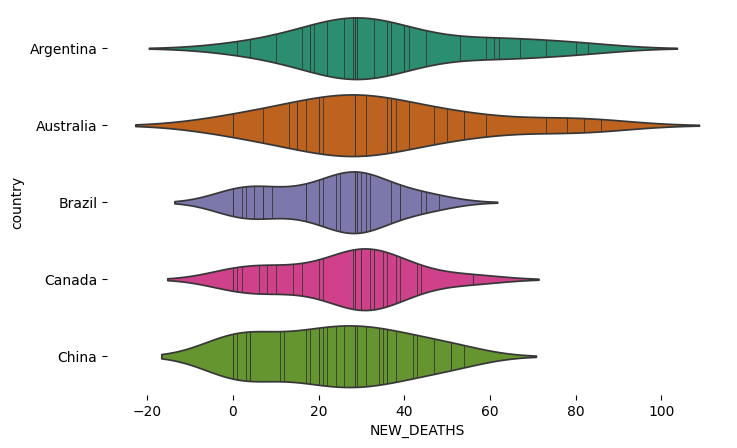

In [25]:
#Country vs NEW Deaths using a violin plot

figsize = (8, 1.0 * len(df['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='NEW_DEATHS', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


**The Violin Plot shows that Australia had the highest number of total deaths over the period**

In [26]:
# Aggregate data by country to get total cases, deaths, and vaccinations
country_summary = df.groupby('country')[['NEW_CASES', 'NEW_DEATHS', 'vaccinated']].sum().reset_index()

country_summary.head()

,country,NEW_CASES,NEW_DEATHS,vaccinated
0,Argentina,24734.064935,1200.848921,5966
1,Australia,23499.064935,1130.323741,13156
2,Brazil,15602.129870,776.848921,5891
3,Canada,16168.064935,803.374101,12200
4,China,15537.032468,786.949640,7487


In [27]:
# Melt the dataframe to have a 'metric' column for plotting
country_melted = country_summary.melt(id_vars='country', var_name='metric', value_name='count')

country_melted.head()

,country,metric,count
0,Argentina,NEW_CASES,24734.064935
1,Australia,NEW_CASES,23499.064935
2,Brazil,NEW_CASES,15602.129870
3,Canada,NEW_CASES,16168.064935
4,China,NEW_CASES,15537.032468


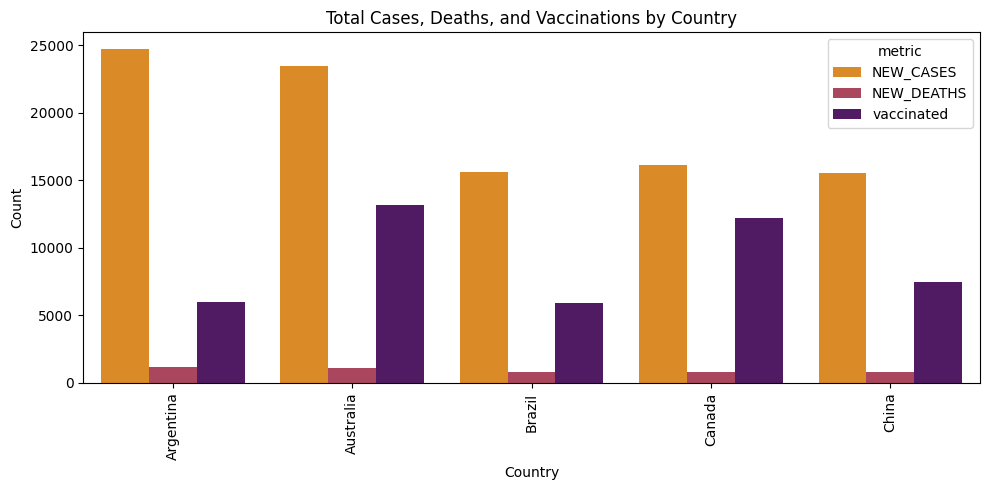

In [28]:
# Create a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=country_melted, x='country', y='count', hue='metric', palette='inferno_r')
plt.title('Total Cases, Deaths, and Vaccinations by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Argentina has the highest number of new cases and China had the lowest number of new cases. Argentina has the highest number of deaths and Brazil has the lowest number of deaths.**

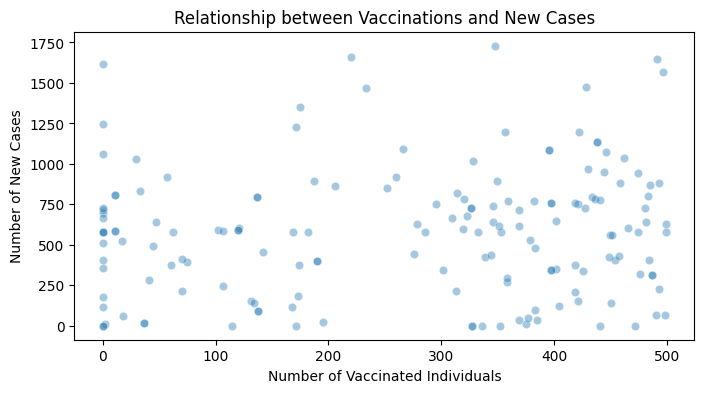

In [29]:

# Visualize Scatter Plots to Explore relationships between new cases and vaccination rates.
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='vaccinated', y='NEW_CASES', alpha=0.4)
plt.title('Relationship between Vaccinations and New Cases')
plt.xlabel('Number of Vaccinated Individuals')
plt.ylabel('Number of New Cases')
plt.show()

**From the graph of vaccination vs new cases, it is seen that there is no correlation between vaccination and the number of new cases.**

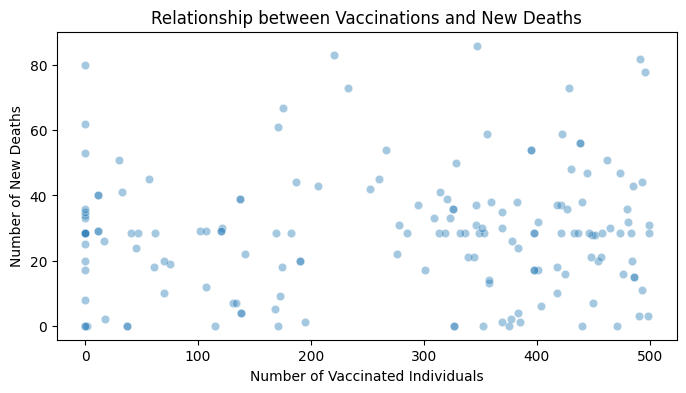

In [30]:
# Visualize Scatter Plots to Explore relationships between new deaths and vaccination rates.
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='vaccinated', y='NEW_DEATHS', alpha=0.4)
plt.title('Relationship between Vaccinations and New Deaths')
plt.xlabel('Number of Vaccinated Individuals')
plt.ylabel('Number of New Deaths')
plt.show()

**From the graph of vaccination vs new deaths, it is seen that there is no correlation between vaccination and the number of new deaths.**

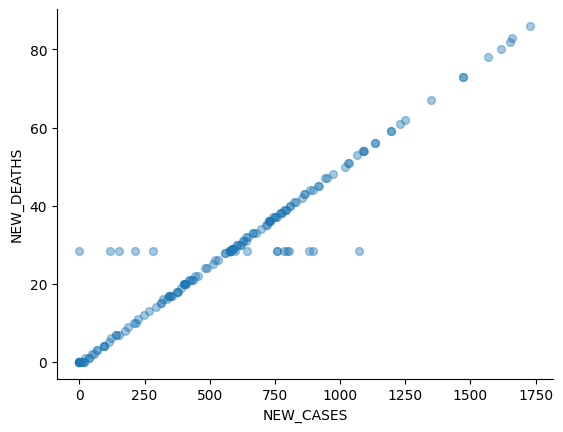

In [31]:
# NEW Cases vs NEW_DEATHS

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='NEW_CASES', y='NEW_DEATHS', s=32, alpha=.4)
plt.gca().spines[['top', 'right',]].set_visible(False)


**From the graph of new deaths vs new cases, it is seen that there is a strong positive correlation between deaths and the number of new cases. This shows that as cases increase, the number of deaths increase too.**